In [1]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import statsmodels.graphics.api as smg

(582, 941)


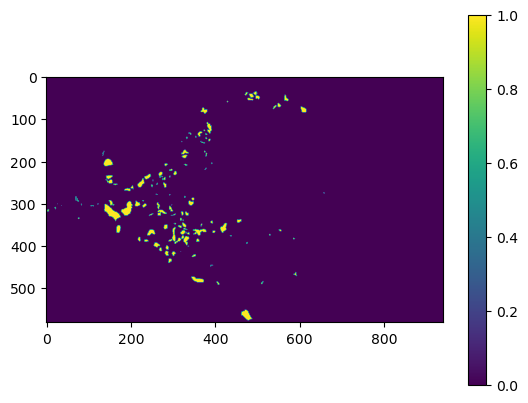

In [118]:
raster = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/Inventario1.tif?raw=true')
inventario=raster.read(1)
print(inventario.shape)
plt.imshow(inventario)
plt.colorbar();

In [119]:
np.unique(inventario)

array([0, 1], dtype=uint8)

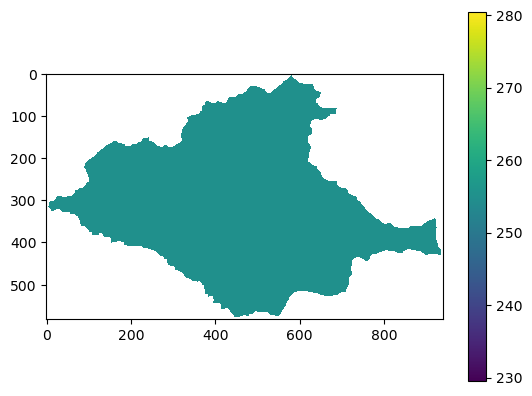

In [120]:
raster = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/Slope.tif?raw=true')
msk=raster.read_masks(1)
msk=np.where(msk==0,np.nan,msk)
plt.imshow(msk)
plt.colorbar();

In [121]:
np.unique(msk)

array([255.,  nan])

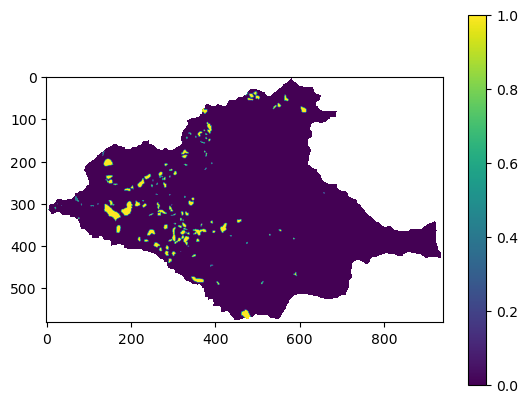

In [122]:
inventario=msk*inventario
inventario=np.where(inventario==255,1,inventario)
plt.imshow(inventario)
plt.colorbar();

In [123]:
np.unique(inventario)

array([ 0.,  1., nan])

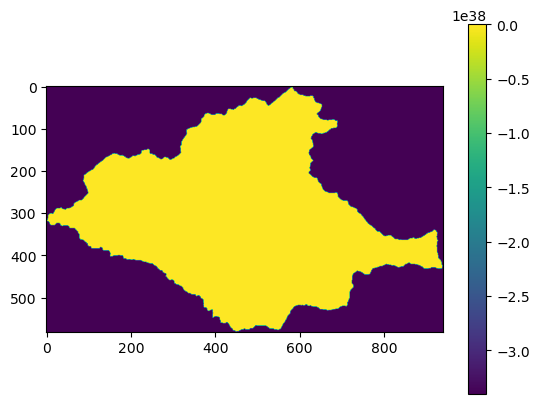

In [124]:
raster = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/Slope.tif?raw=true')
pendiente=raster.read(1)
plt.imshow(pendiente)
plt.colorbar();

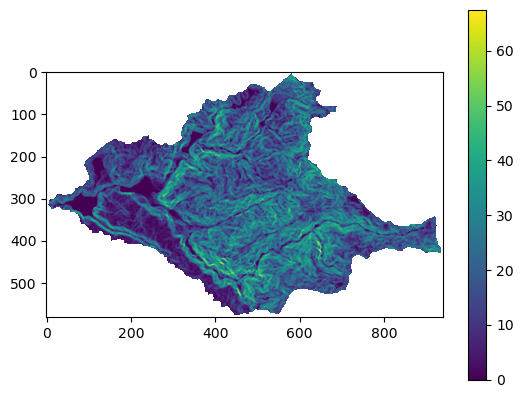

In [125]:
pendiente=np.where(pendiente<0,np.nan,pendiente)
plt.imshow(pendiente)
plt.colorbar();

In [126]:
type(pendiente)

numpy.ndarray

In [127]:
np.shape(pendiente)

(582, 941)

In [128]:
pendiente_vector=pendiente.ravel()  # para pasarlo a un vector
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)] # para eliminar  del vector los datos NaN
pendiente_vector_MenM.shape # otra forma de saber las dimensiones

(259233,)

(259233,)

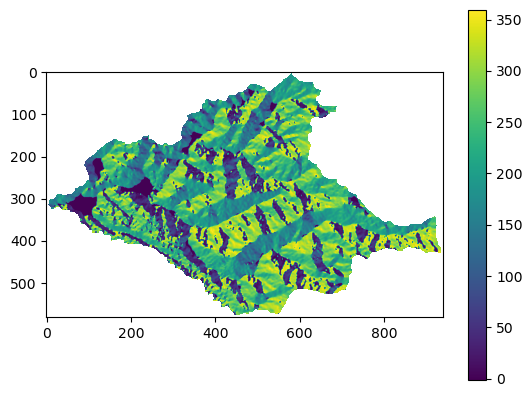

In [129]:
raster = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/Aspecto.tif?raw=true')
aspecto=raster.read(1)
aspecto=np.where(aspecto<-100,np.nan,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar()
aspecto_vector_MenM.shape

(259233,)

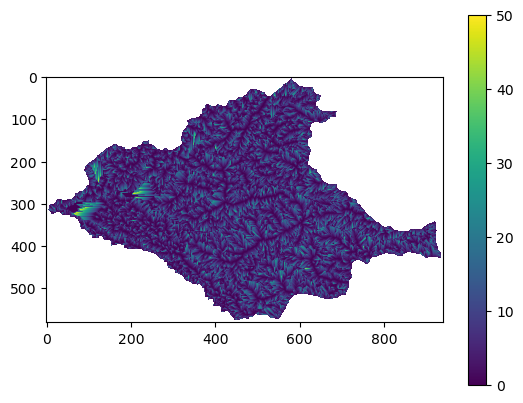

In [130]:
raster = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/FA.tif?raw=true')
flujo=raster.read(1)
flujo=np.where(flujo<0,np.nan,flujo)
flujo=np.where(flujo>50,0,flujo)
flujo_vector=flujo.ravel()
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)]
plt.imshow(flujo)
plt.colorbar()
flujo.shape
flujo_vector_MenM.shape

In [131]:
flujo_vector=flujo.ravel()  # para pasarlo a un vector
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)] # para eliminar  del vector los datos NaN
flujo_vector_MenM.shape # otra forma de saber las dimensiones

(259233,)

(259233,)

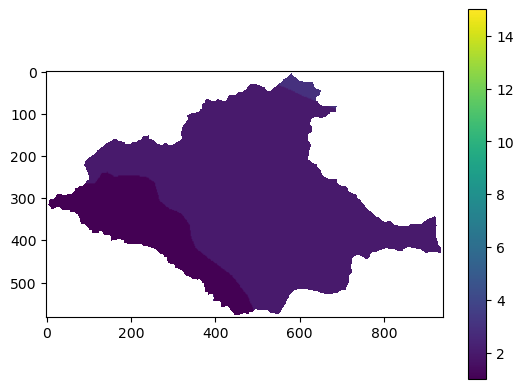

In [132]:
raster = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/GEOLOG%C3%8DA.tif?raw=true')
geologia=raster.read(1)
geologia=np.where(geologia<1,np.nan,geologia)
geologia=np.where(geologia>15,np.nan,geologia)
geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]
plt.imshow(geologia)
plt.colorbar()
geologia_vector_MenM.shape

In [133]:
np.unique(geologia)

array([ 1.,  2.,  3., 15., nan])

In [134]:
geologia_vector=geologia.ravel()  # para pasarlo a un vector
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)] # para eliminar  del vector los datos NaN
geologia_vector_MenM.shape # otra forma de saber las dimensiones

(259233,)

(259233,)

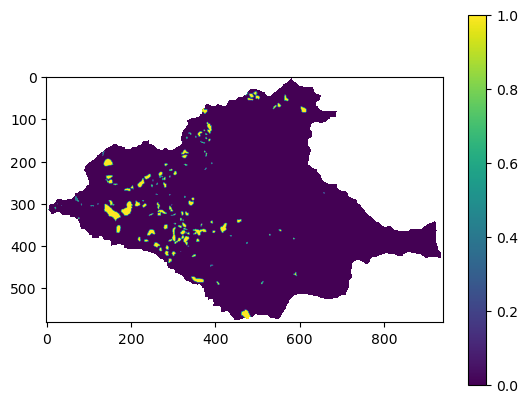

In [135]:
raster = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/Inventario1.tif?raw=true')
inventario=raster.read(1)
raster_mask = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/Slope.tif?raw=true')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
inventario=msk*inventario
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape

(259233,)

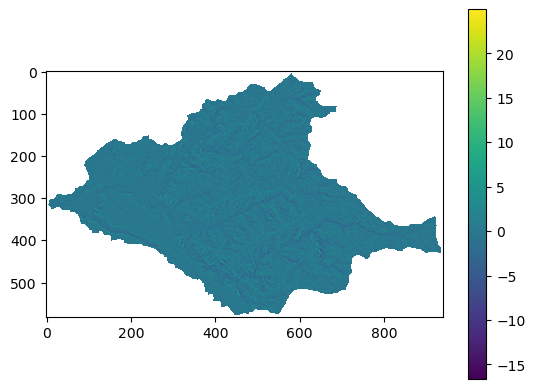

In [138]:
raster = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/Curvatura.tif?raw=true')
curvatura=raster.read(1)
curvatura=np.where(curvatura<-16.64,np.nan,curvatura)
curvatura_vector=curvatura.ravel()
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]
plt.imshow(curvatura)
plt.colorbar()
curvatura.shape
curvatura_vector_MenM.shape

(259233,)

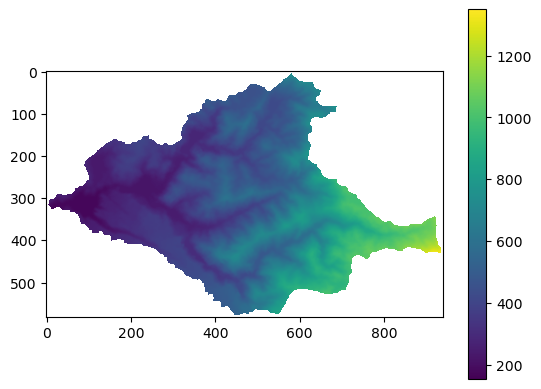

In [139]:
raster = rio.open('https://github.com/Caritos113/Cartograf-a-Geot-cnica/blob/main/Taller%203/Variables/DEM_.tif?raw=true')
elevacion=raster.read(1)
elevacion=np.where(elevacion<154,np.nan,elevacion)
elevacion_vector=elevacion.ravel()
elevacion_vector_MenM=elevacion_vector[~np.isnan(elevacion_vector)]
plt.imshow(elevacion)
plt.colorbar()
elevacion_vector_MenM.shape

In [140]:
d={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM,'flujo_acum':flujo_vector_MenM,'aspecto':aspecto_vector_MenM, 'geologia':geologia_vector_MenM, 'elevacion':elevacion_vector_MenM, 'curvatura':curvatura_vector_MenM}
df = pd.DataFrame(d)
print(list(df.columns))

['inventario', 'pendiente', 'flujo_acum', 'aspecto', 'geologia', 'elevacion', 'curvatura']


In [141]:
df.head()

inventario  pendiente  flujo_acum     aspecto  geologia  elevacion  \
0         0.0   7.825526         1.0  194.036240       3.0      763.0   
1         0.0   8.447319         1.0  170.960526       3.0      763.0   
2         0.0   8.778080         0.0  212.660919       3.0      762.0   
3         0.0   6.302977         1.0  185.194427       3.0      762.0   
4         0.0   4.714065         1.0  194.036240       3.0      762.0   

   curvatura  
0      -0.64  
1      -1.28  
2       1.92  
3       0.64  
4      -0.00

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259233 entries, 0 to 259232
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   inventario  259233 non-null  float64
 1   pendiente   259233 non-null  float32
 2   flujo_acum  259233 non-null  float32
 3   aspecto     259233 non-null  float32
 4   geologia    259233 non-null  float64
 5   elevacion   259233 non-null  float64
 6   curvatura   259233 non-null  float32
dtypes: float32(4), float64(3)
memory usage: 9.9 MB


Muestreo

In [143]:
df1=df[(df["inventario"]==1) | (df["inventario"]==0).sample(frac=.1)]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32686 entries, 4 to 259224
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   inventario  32686 non-null  float64
 1   pendiente   32686 non-null  float32
 2   flujo_acum  32686 non-null  float32
 3   aspecto     32686 non-null  float32
 4   geologia    32686 non-null  float64
 5   elevacion   32686 non-null  float64
 6   curvatura   32686 non-null  float32
dtypes: float32(4), float64(3)
memory usage: 1.5 MB


In [144]:
resumen=df1.describe().T
print(resumen)

              count        mean         std     min         25%         50%  \
inventario  32686.0    0.228446    0.419838    0.00    0.000000    0.000000   
pendiente   32686.0   18.179079   10.865804    0.00    9.664409   17.744671   
flujo_acum  32686.0    6.331090    8.996621    0.00    0.000000    3.000000   
aspecto     32686.0  197.328842  110.506882   -1.00  117.474434  218.157227   
geologia    32686.0    1.734688    0.499693    1.00    1.000000    2.000000   
elevacion   32686.0  497.360246  227.475186  155.00  316.000000  446.000000   
curvatura   32686.0   -0.029312    1.364145  -10.24   -0.640000   -0.000000   

                   75%          max  
inventario    0.000000     1.000000  
pendiente    25.795492    63.873562  
flujo_acum    8.000000    50.000000  
aspecto     290.833908   359.443756  
geologia      2.000000    15.000000  
elevacion   617.000000  1339.000000  
curvatura     0.640000    12.800000  


In [145]:
matriz=df.drop(['inventario'],axis=1) # función para eliminar una columna (axis=1)
matriz.head()

pendiente  flujo_acum     aspecto  geologia  elevacion  curvatura
0   7.825526         1.0  194.036240       3.0      763.0      -0.64
1   8.447319         1.0  170.960526       3.0      763.0      -1.28
2   8.778080         0.0  212.660919       3.0      762.0       1.92
3   6.302977         1.0  185.194427       3.0      762.0       0.64
4   4.714065         1.0  194.036240       3.0      762.0      -0.00

In [146]:
matriz_cont=matriz.drop(['geologia'],axis=1)
matriz_cont.head()

pendiente  flujo_acum     aspecto  elevacion  curvatura
0   7.825526         1.0  194.036240      763.0      -0.64
1   8.447319         1.0  170.960526      763.0      -1.28
2   8.778080         0.0  212.660919      762.0       1.92
3   6.302977         1.0  185.194427      762.0       0.64
4   4.714065         1.0  194.036240      762.0      -0.00

Análisis de todas las variables

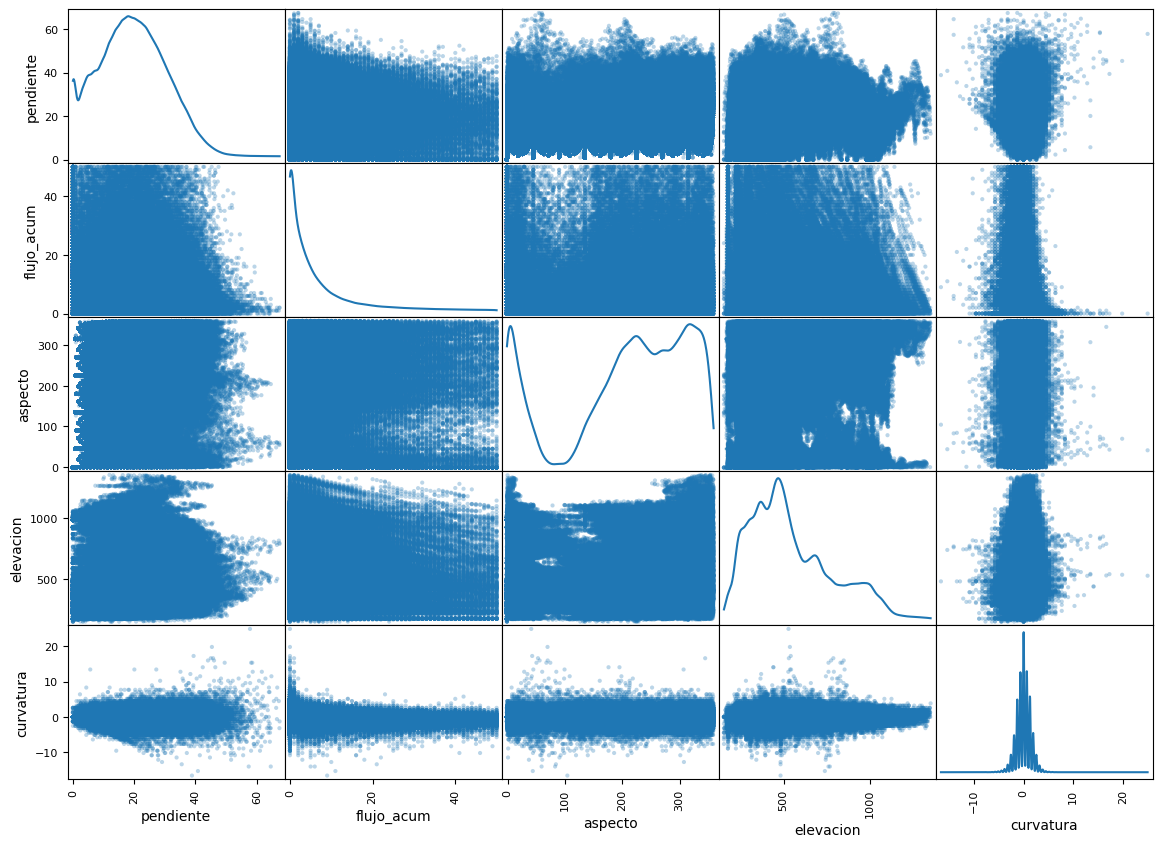

In [147]:
pd.plotting.scatter_matrix(matriz_cont, alpha = 0.3, figsize = (14,10), diagonal='kde');

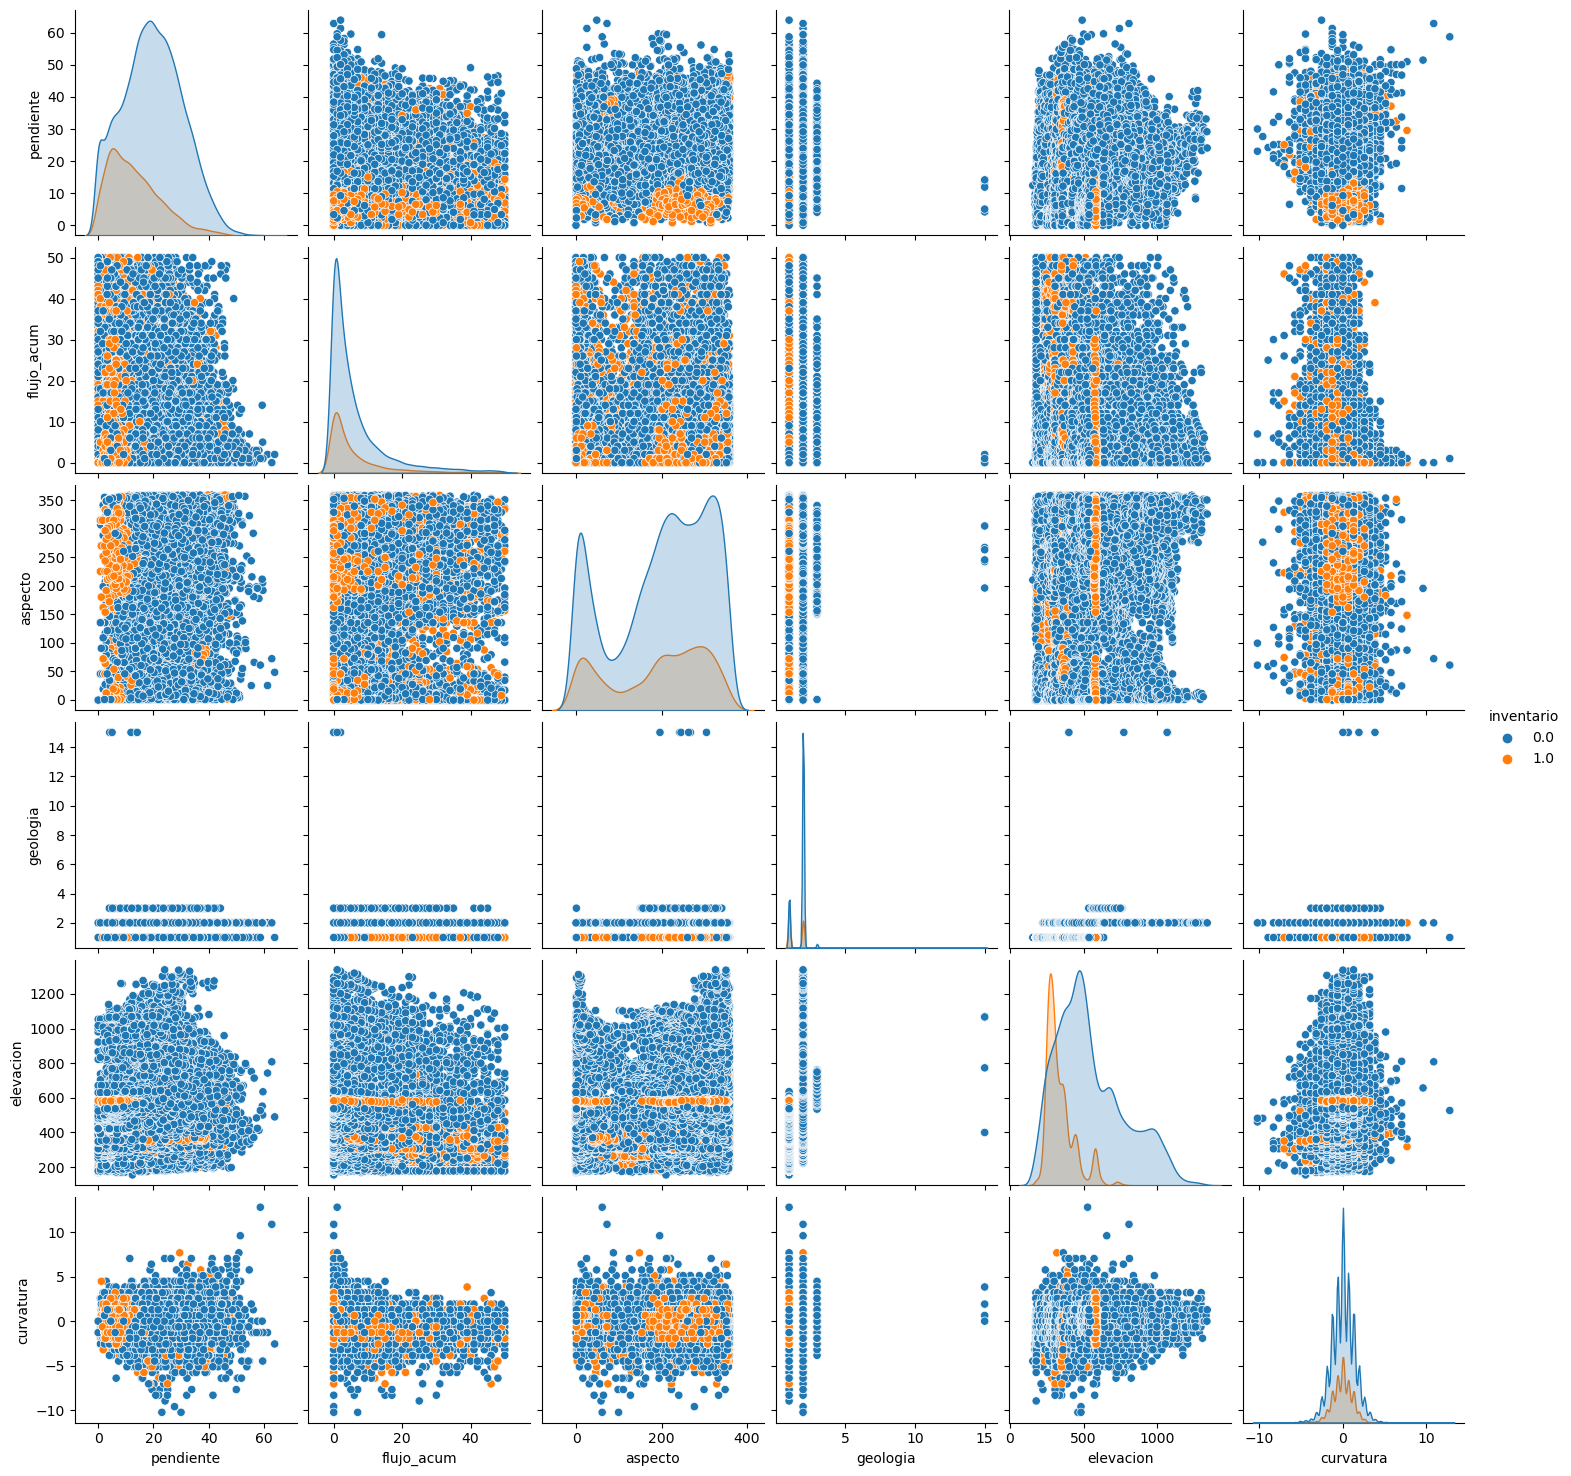

In [148]:
sns.pairplot(df1, hue='inventario');

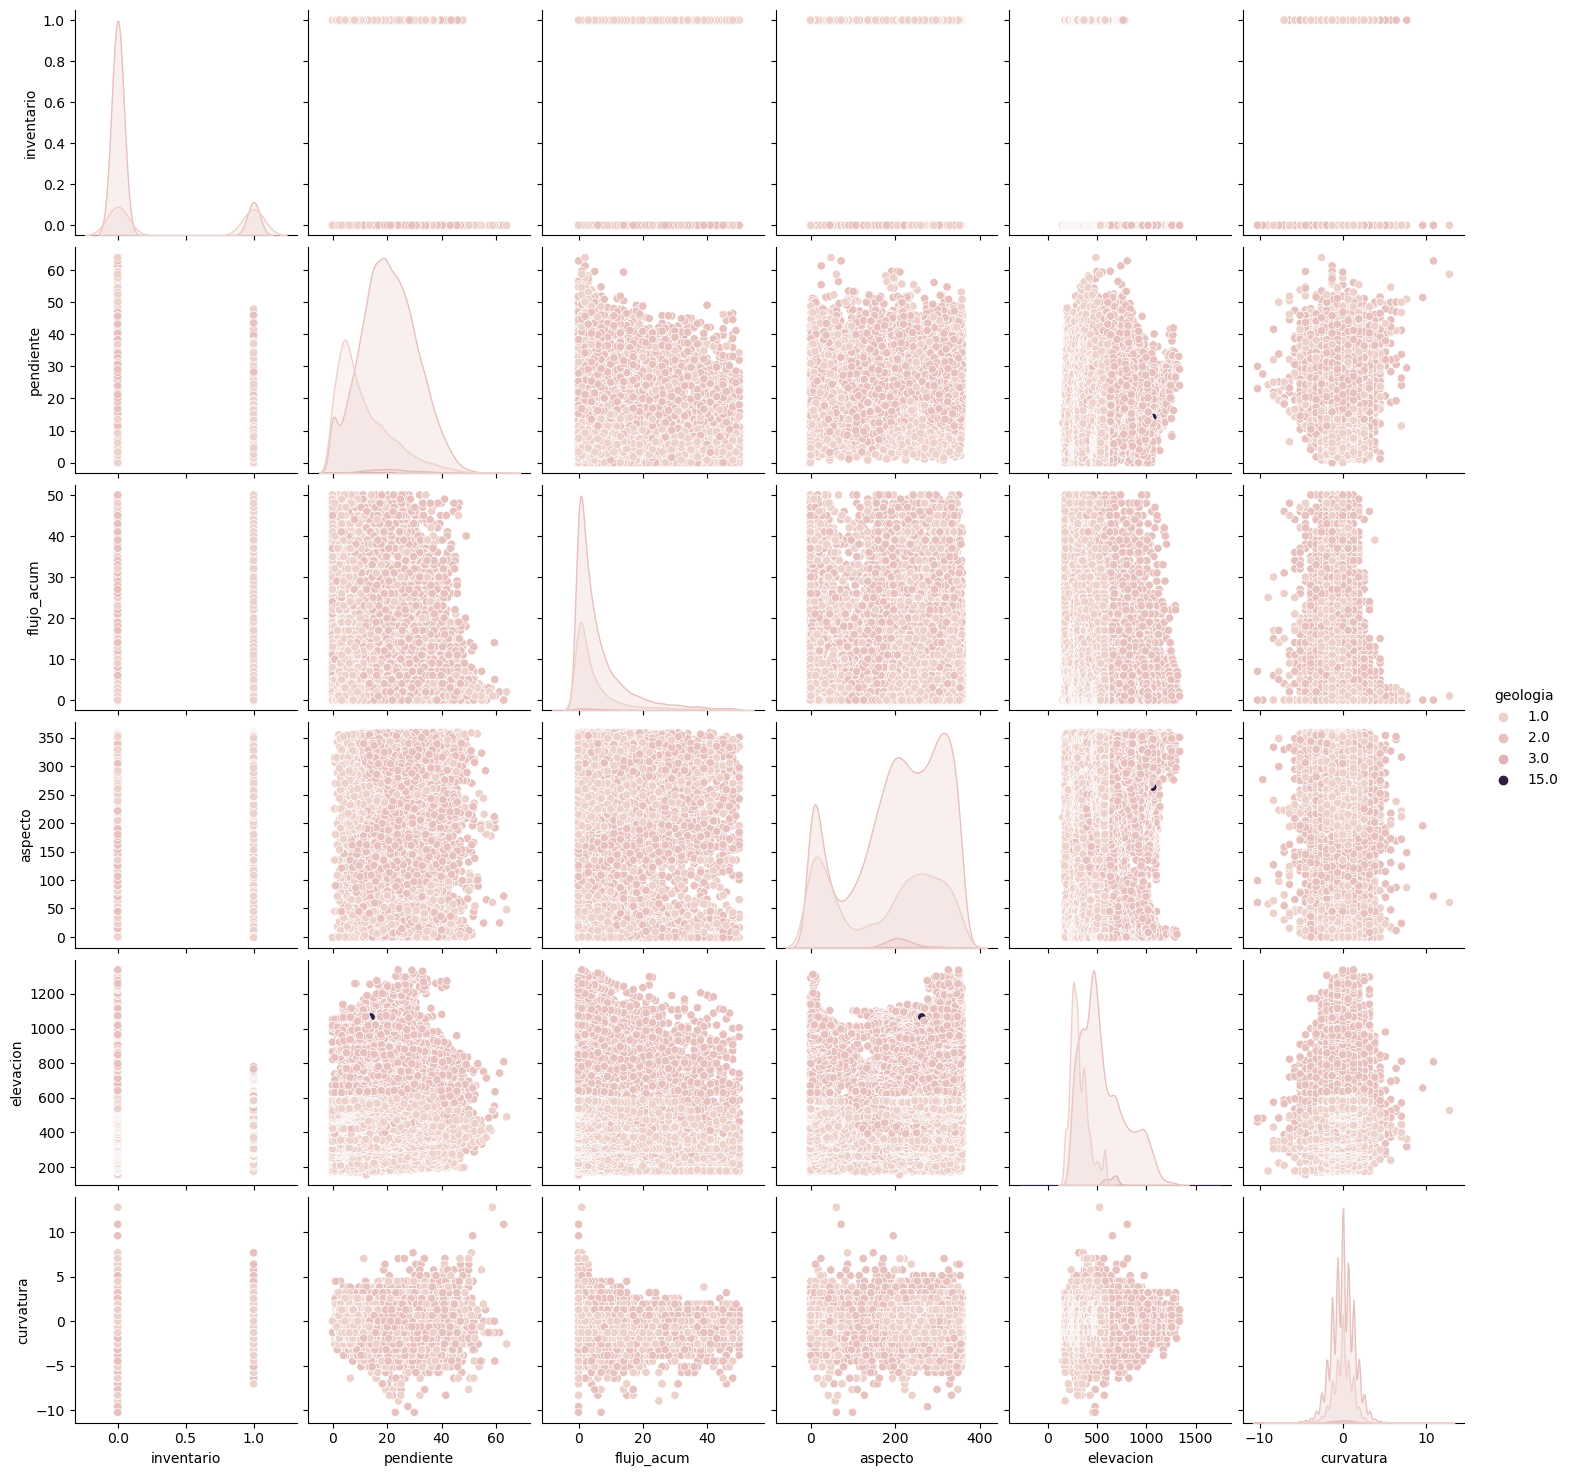

In [149]:
sns.pairplot(df1, hue='geologia');

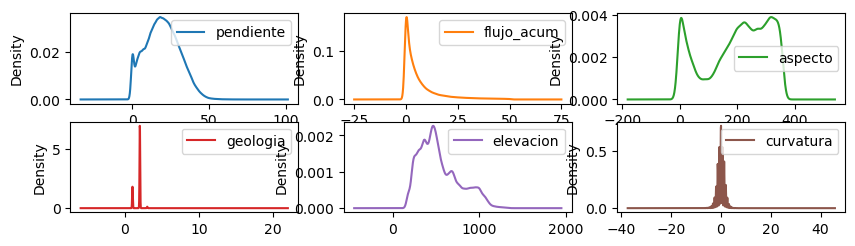

In [150]:
matriz.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(10, 4));

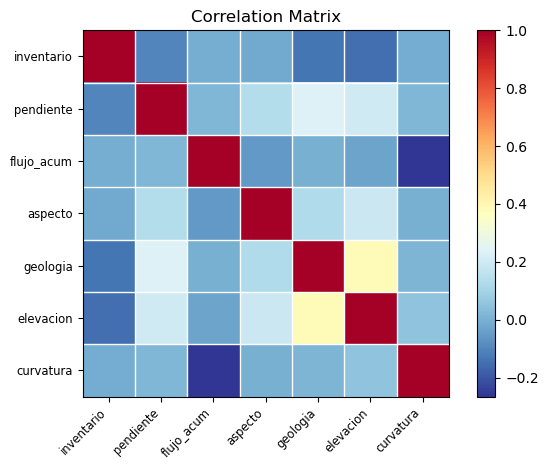

In [151]:
MatCorre=DataFrame(df.corr())
smg.plot_corr(MatCorre, xnames=list(MatCorre.columns)) ;

Análisis univariado

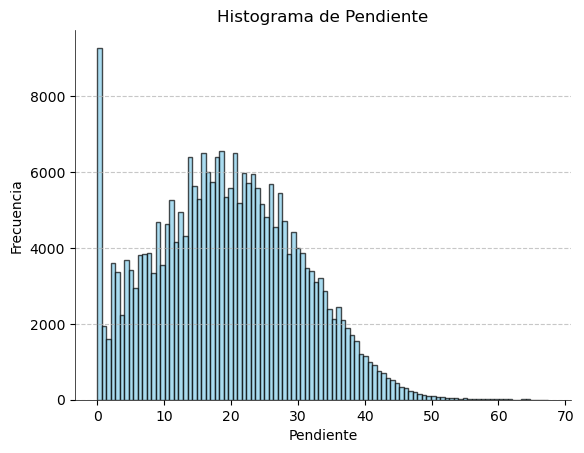

In [152]:
plt.hist(df['pendiente'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Pendiente')
plt.xlabel('Pendiente')
plt.ylabel('Frecuencia')

# Agrega una cuadrícula de fondo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agrega un borde alrededor del histograma
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Muestra el histograma
plt.show()

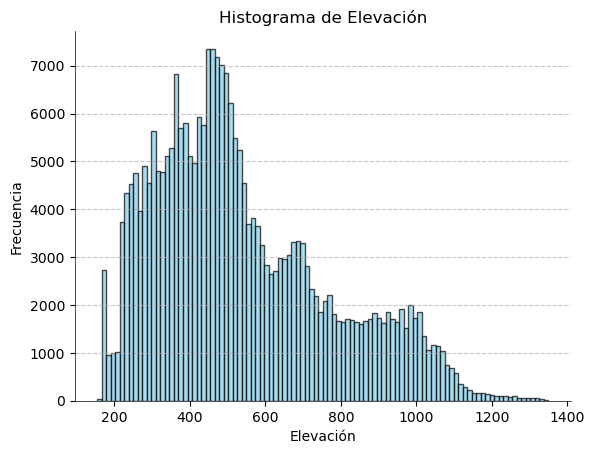

In [153]:
plt.hist(df['elevacion'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Elevación')
plt.xlabel('Elevación')
plt.ylabel('Frecuencia')

# Agrega una cuadrícula de fondo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agrega un borde alrededor del histograma
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Muestra el histograma
plt.show()

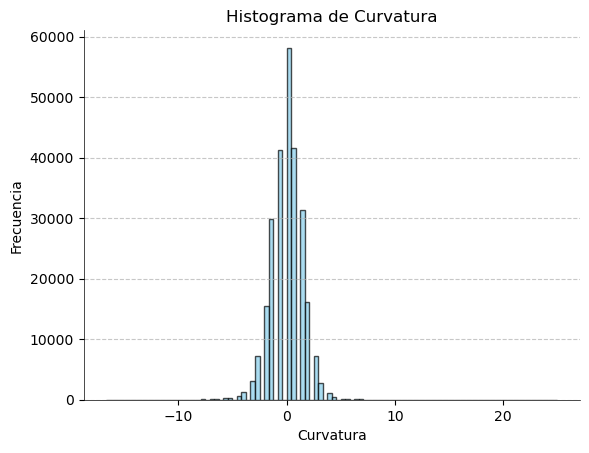

In [154]:
plt.hist(df['curvatura'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de Curvatura')
plt.xlabel('Curvatura')
plt.ylabel('Frecuencia')

# Agrega una cuadrícula de fondo
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agrega un borde alrededor del histograma
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Muestra el histograma
plt.show()

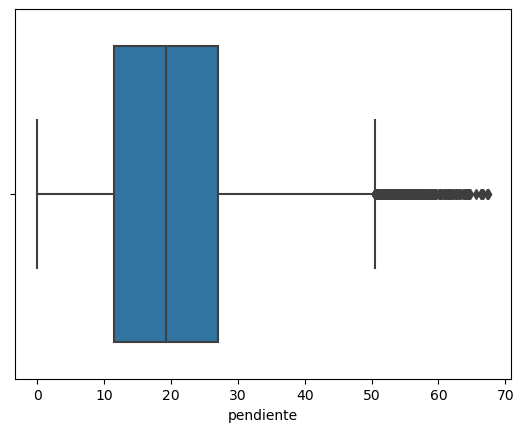

In [155]:
sns.boxplot(x='pendiente', data=df);

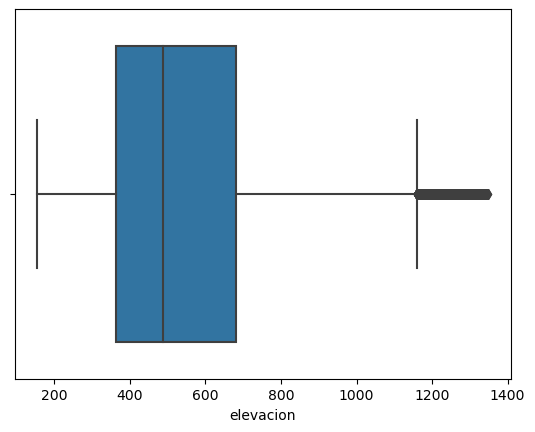

In [156]:
sns.boxplot(x='elevacion', data=df);

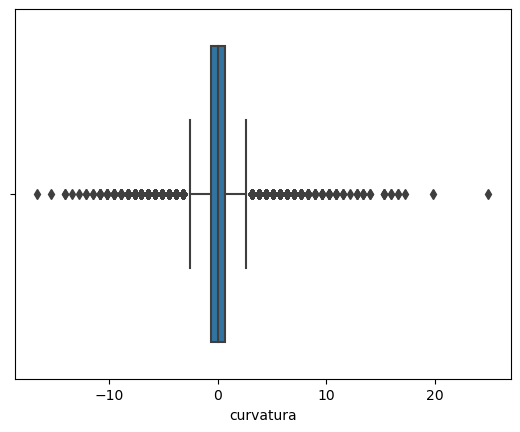

In [157]:
sns.boxplot(x='curvatura', data=df);

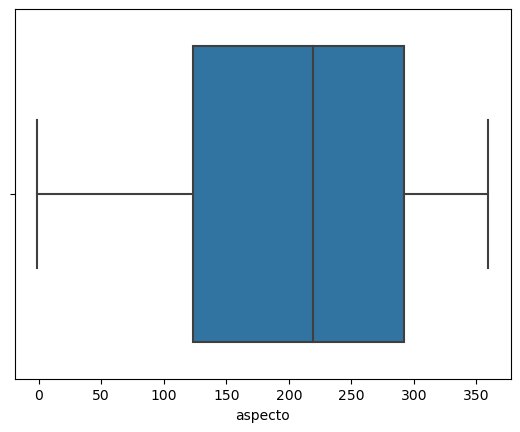

In [158]:
sns.boxplot(x='aspecto', data=df);

<Axes: xlabel='aspecto', ylabel='Density'>

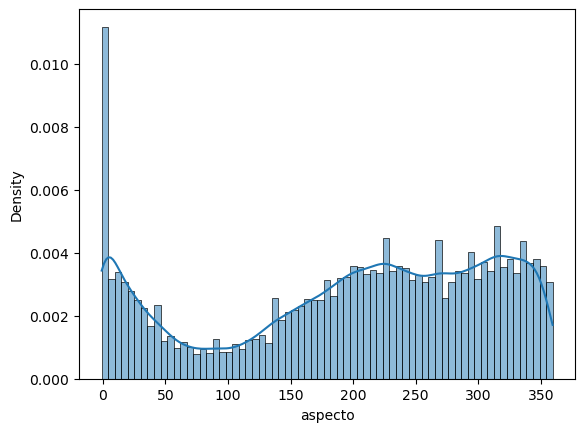

In [159]:
sns.histplot(df["aspecto"], kde=True, stat="density")

<Axes: xlabel='flujo_acum', ylabel='Density'>

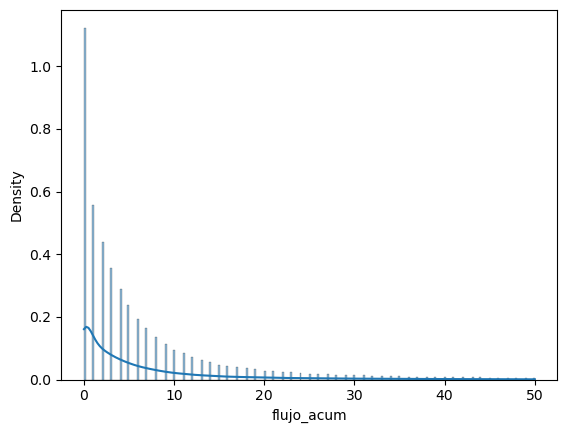

In [160]:
sns.histplot(df["flujo_acum"], kde=True, stat="density")

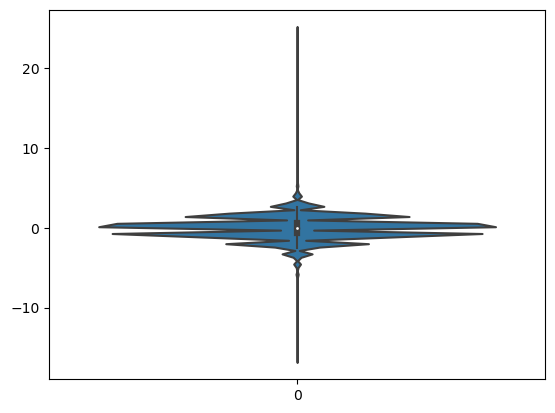

In [161]:
sns.violinplot(df['curvatura']);

Analisis multivariado

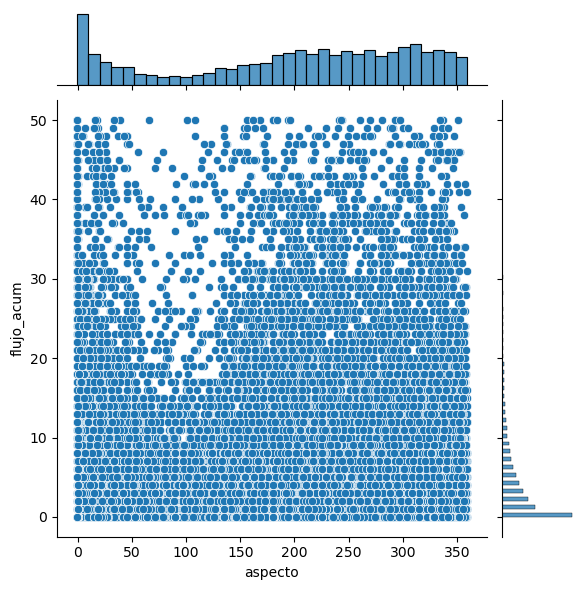

In [162]:
sns.jointplot(x='aspecto', y='flujo_acum', data=df1, kind='scatter');

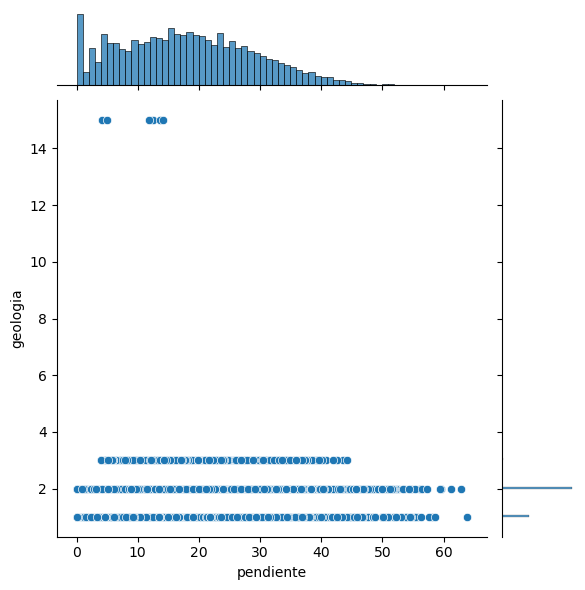

In [163]:
sns.jointplot(x='pendiente', y='geologia', data=df1, kind='scatter');

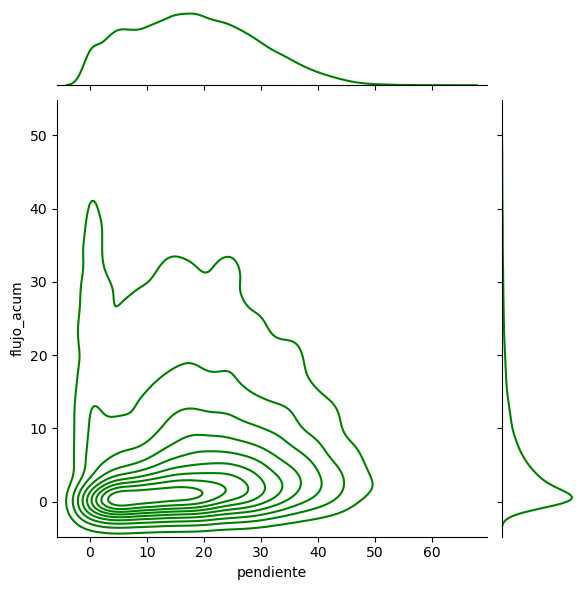

In [164]:
sns.jointplot(x='pendiente', y='flujo_acum', data=df1, kind='kde', color='g');

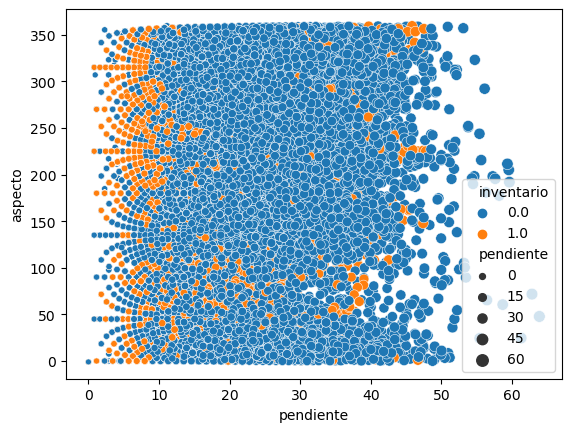

In [165]:
sns.scatterplot(x="pendiente", y="aspecto", hue="inventario", size='pendiente',data=df1);

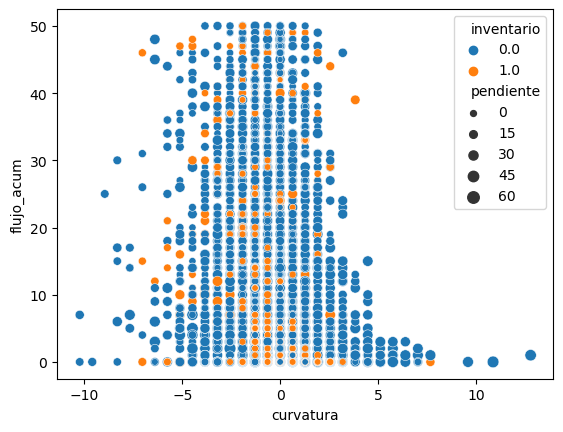

In [166]:
sns.scatterplot(x="curvatura", y="flujo_acum", hue="inventario", size='pendiente',data=df1)
colores = sns.color_palette("Set2");

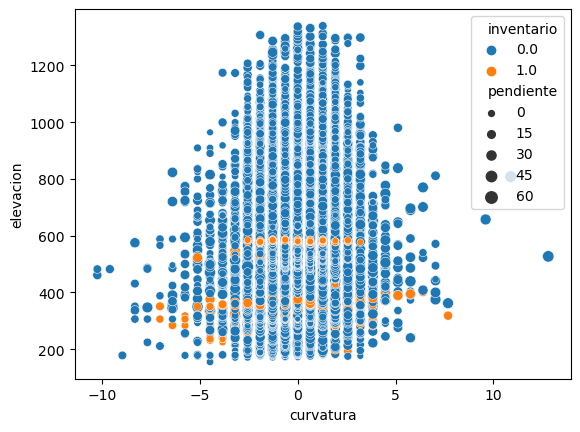

In [167]:
sns.scatterplot(x="curvatura", y="elevacion", hue="inventario", size='pendiente',data=df1);

Correlación con la variable dependiente

In [168]:
media=df.groupby('inventario').mean()
print(media)

            pendiente  flujo_acum     aspecto  geologia   elevacion  curvatura
inventario                                                                    
0.0         19.669382    6.293133  199.259872  1.832765  543.970909  -0.004660
1.0         13.226684    6.101111  188.496201  1.418776  338.324628  -0.086825


In [169]:
#Para contar el numero de celdas con y sin MenM
df['inventario'].value_counts()

0.0    251766
1.0      7467
Name: inventario, dtype: int64

In [170]:
landslides=df.inventario.astype(bool)
si_lands=df[landslides]
no_lands=df[~landslides]

In [171]:
si_lands.count()

inventario    7467
pendiente     7467
flujo_acum    7467
aspecto       7467
geologia      7467
elevacion     7467
curvatura     7467
dtype: int64

In [172]:
no_lands.count()

inventario    251766
pendiente     251766
flujo_acum    251766
aspecto       251766
geologia      251766
elevacion     251766
curvatura     251766
dtype: int64

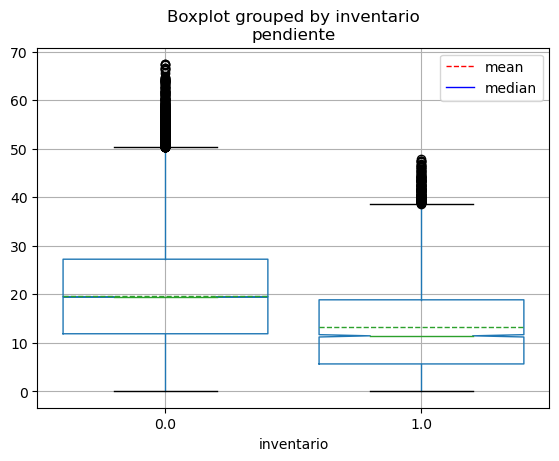

In [173]:
df.boxplot('pendiente', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

In [174]:
from scipy import stats
stats.ttest_ind(no_lands["pendiente"], si_lands["pendiente"])

Ttest_indResult(statistic=51.03538817654904, pvalue=0.0)

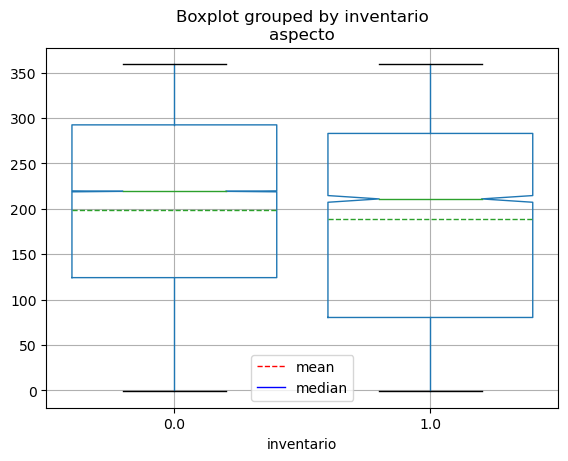

In [175]:
df.boxplot('aspecto', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

In [176]:
from scipy import stats
stats.ttest_ind(no_lands["aspecto"], si_lands["aspecto"])

Ttest_indResult(statistic=8.323581432499674, pvalue=8.575189086076922e-17)

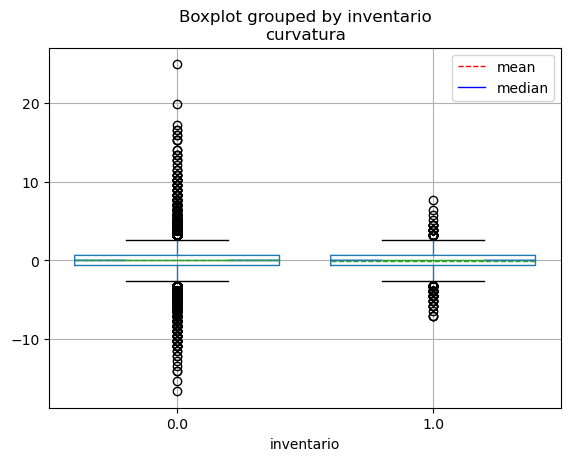

In [177]:
df.boxplot('curvatura', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

In [178]:
from scipy import stats
stats.ttest_ind(no_lands["curvatura"], si_lands["curvatura"])

Ttest_indResult(statistic=4.919293685714857, pvalue=8.691012282784365e-07)

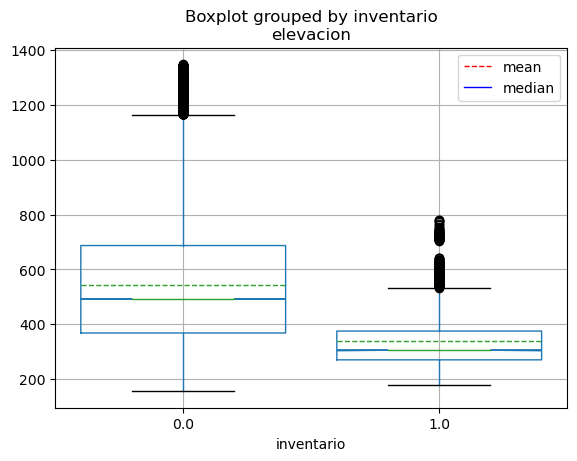

In [179]:
df.boxplot('elevacion', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

In [180]:
from scipy import stats
stats.ttest_ind(no_lands["elevacion"], si_lands["elevacion"])

Ttest_indResult(statistic=76.42075822480604, pvalue=0.0)

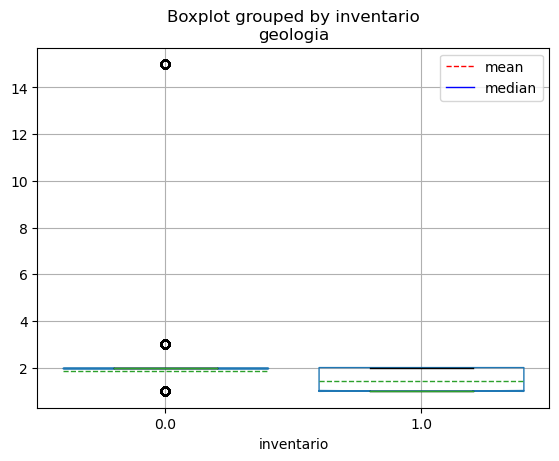

In [181]:
df.boxplot('geologia', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

In [182]:
from scipy import stats
stats.ttest_ind(no_lands["geologia"], si_lands["geologia"])

Ttest_indResult(statistic=68.1972726263542, pvalue=0.0)

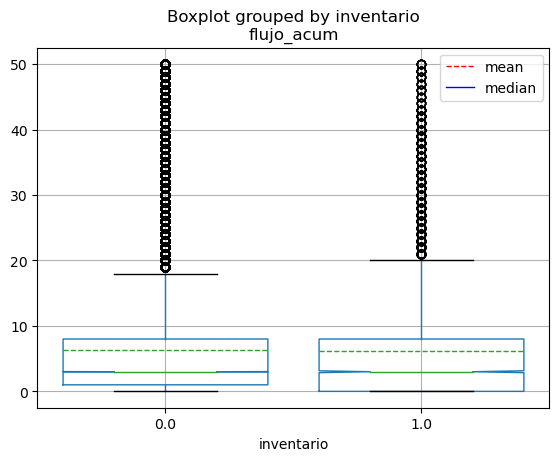

In [183]:
df.boxplot('flujo_acum', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

In [184]:
from scipy import stats
stats.ttest_ind(no_lands["flujo_acum"], si_lands["flujo_acum"])

Ttest_indResult(statistic=1.8334019626478961, pvalue=0.06674396190483213)

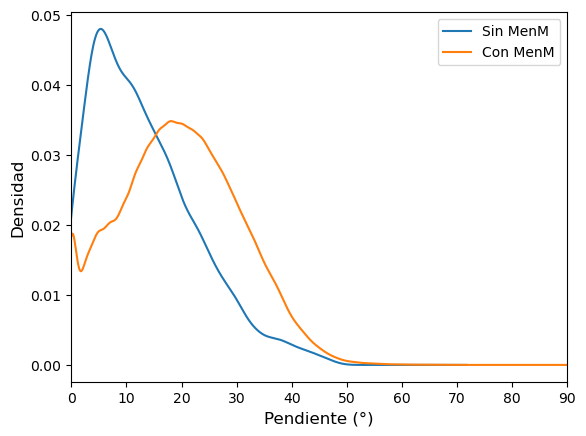

In [185]:
fig, ax = plt.subplots()
si_lands['pendiente'].plot.kde(ax=ax, label='Sin MenM')
no_lands['pendiente'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,90)
ax.set_xlabel('Pendiente (°)', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

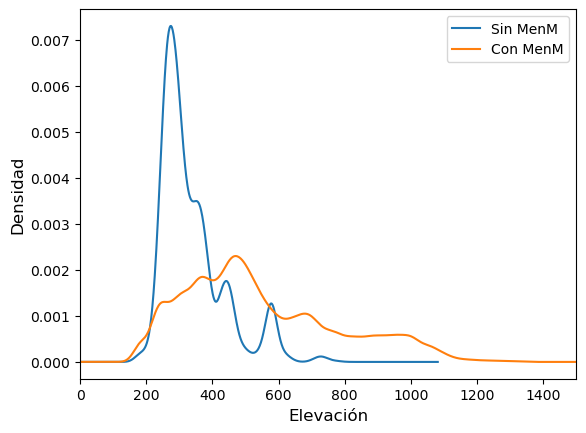

In [186]:
fig, ax = plt.subplots()
si_lands['elevacion'].plot.kde(ax=ax, label='Sin MenM')
no_lands['elevacion'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,1500)
ax.set_xlabel('Elevación', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

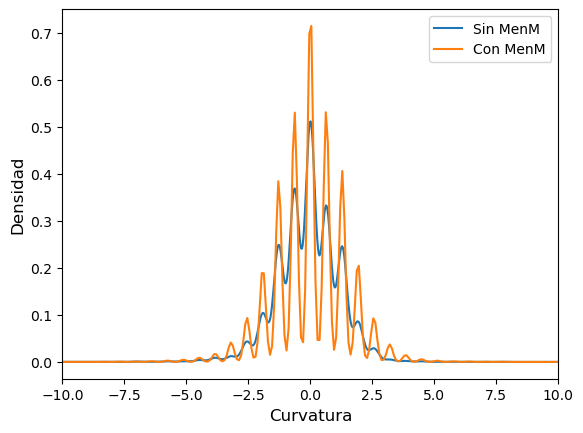

In [187]:
fig, ax = plt.subplots()
si_lands['curvatura'].plot.kde(ax=ax, label='Sin MenM')
no_lands['curvatura'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(-10,10)
ax.set_xlabel('Curvatura', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

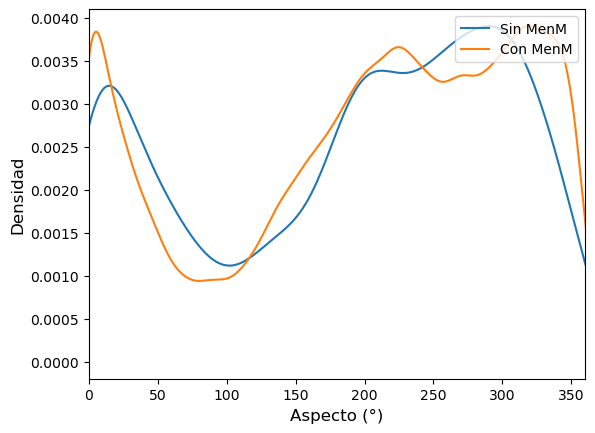

In [192]:
fig, ax = plt.subplots()
si_lands['aspecto'].plot.kde(ax=ax, label='Sin MenM')
no_lands['aspecto'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,360)
ax.set_xlabel('Aspecto (°)', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

C:\Users\carol\AppData\Local\Temp\ipykernel_1924\776021121.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(si_lands['pendiente'])
C:\Users\carol\AppData\Local\Temp\ipykernel_1924\776021121.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no_lands['pendiente']);


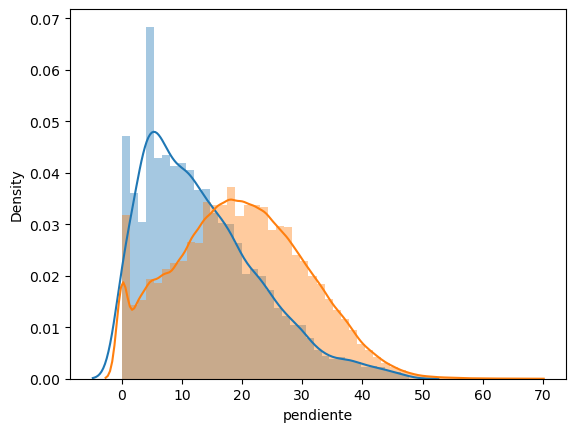

In [189]:
sns.distplot(si_lands['pendiente'])
sns.distplot(no_lands['pendiente']);

Análisis de Componentes Principales (PCA)

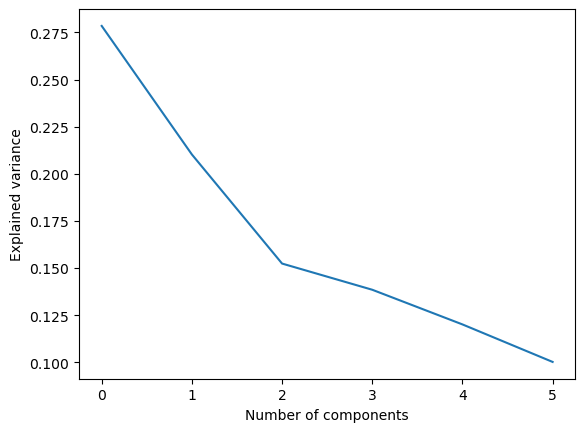

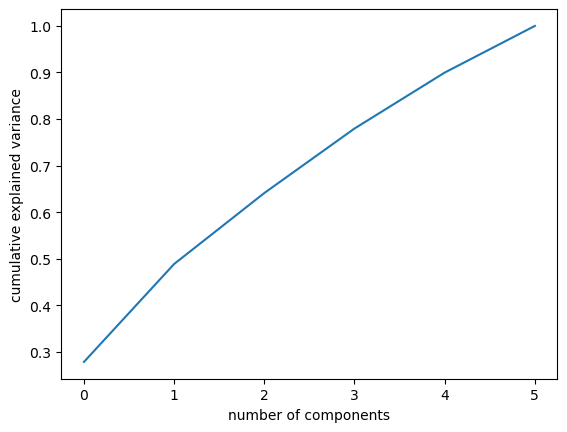

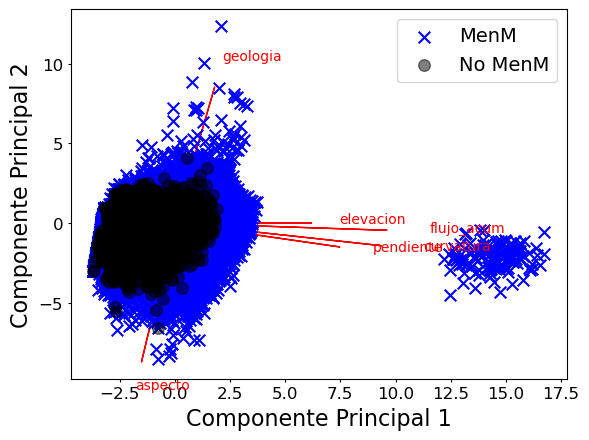

In [190]:
#se importan todas las librerias a utilizar
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#Se importan los archivos

puntos=df['inventario']
df.drop('inventario', axis=1, inplace=True)

# Se debe escalar los datos antes de aplicar PCA
df = pd.DataFrame(scale(df), columns=['pendiente', 'aspecto', 'elevacion', 'curvatura', 'flujo_acum' , 'geologia']
)

## Se implementa el análisi PCA con la libreria sklearn de python
n = len(df.columns)
pca = PCA(n_components=n)
pca = pca.fit(df)
pca_samples = pca.transform(df)

#Se puede graficar cuanto aporta a la varianza cada componente generado
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#Para identificar cada variable como se relaciona con las componentes utilizamos las figuras byplot de python
# 0,1 denota el componente princiapl 1 y 2 (PC1 and PC2); para otros componentes se modifica el número
xvector = pca.components_[0] 
yvector = pca.components_[1]

xs = pca.transform(df)[:,0] # Componente principal 1
ys = pca.transform(df)[:,1] # Componente principal 2

mask1=np.ma.masked_where(puntos < 1,xs )
mask2=np.ma.masked_where(puntos < 1,ys ) 

## Para visualizar las proyecciones de cada variable en los componentes se utiliza la siguiente función
for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(df.columns.values)[i], color='r') 

plt.scatter(xs, ys, s=70,marker='x',c='blue', label='MenM')
plt.scatter(mask1,mask2,facecolors='black', edgecolors='black', s=70, alpha=0.5, label='No MenM')
plt.tick_params('y', colors='k', labelsize=12, length=2)
plt.tick_params('x', colors='k', labelsize= 12, length=2)
plt.xlabel("Componente Principal 1", fontsize=16)
plt.ylabel("Componente Principal 2", fontsize=16)
plt.legend(fontsize=14)
plt.show()

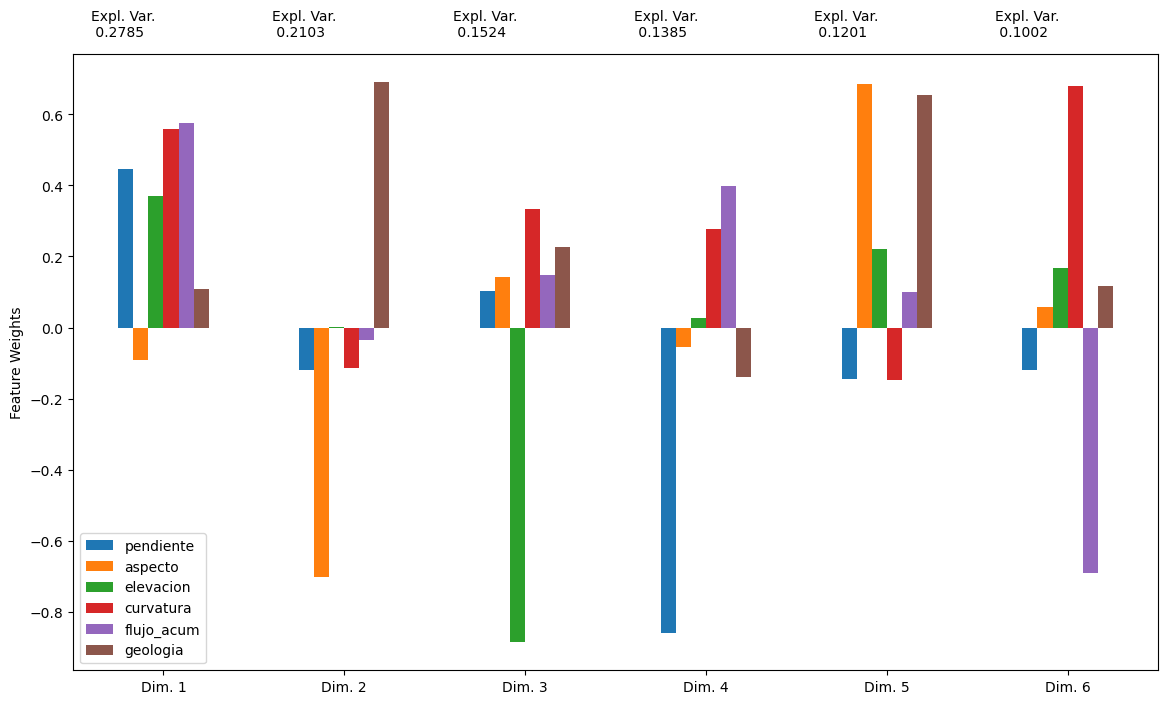

In [191]:
def pca_results(data, pca):
    
    dimensions = ['Dim. {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (14,8))

    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Expl. Var.\n %.4f"%(ev))

    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(df, pca)